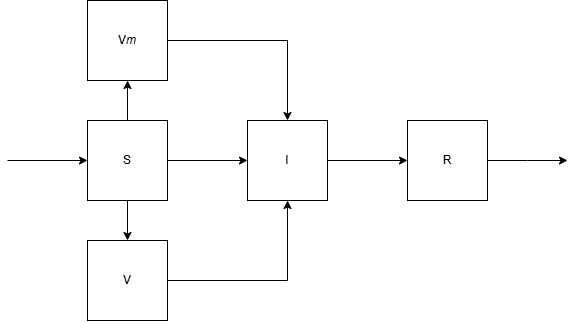

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

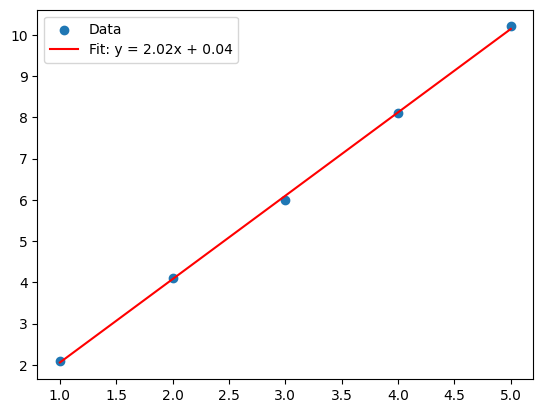

In [2]:
# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 4.1, 6.0, 8.1, 10.2])

# Linear fitting
coeffs = np.polyfit(x, y, 1)  # Fit polynomial degree 1 (linear)
m, c = coeffs

# Predicted line
y_pred = m * x + c

# Plot
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color="red", label=f"Fit: y = {m:.2f}x + {c:.2f}")
plt.legend()
plt.show()


In [3]:
# Definisi parameter
alpha = 0.01  # Laju kelahiran
beta1 = 0.3   # Tingkat infeksi untuk individu S
beta2 = 0.2   # Tingkat infeksi untuk individu V
beta3 = 0.4   # Tingkat infeksi untuk individu Vm
gamma1 = 0.05 # Laju vaksinasi
gamma2 = 0.03 # Laju terpengaruh misinformasi
gamma3 = 0.1  # Laju pemulihan
gamma = 0.01  # Kehilangan kekebalan permanen
mu = 0.01     # Laju kematian alami

# Total populasi (N)
N = 1000

# Waktu simulasi (hari)
T = 200

t = np.linspace(0, T, T)

In [4]:
# Model persamaan diferensial
def sir_vm_model(y, t, alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, gamma, mu, N):
    S, V, Vm, I, R = y
    
    dSdt = alpha * N - (beta1 * S * I) / N - gamma1 * S - gamma2 * S - mu * S
    dVdt = gamma1 * S - (beta2 * V * I) / N - mu * V
    dVmdt = gamma2 * S - (beta3 * Vm * I) / N - mu * Vm
    dIdt = (beta1 * S * I) / N + (beta2 * V * I) / N + (beta3 * Vm * I) / N - gamma3 * I - mu * I
    dRdt = gamma3 * I - gamma * R

    return [dSdt, dVdt, dVmdt, dIdt, dRdt]

In [5]:
# Kondisi awal
S0 = 900    # Populasi awal individu rentan
V0 = 50     # Populasi awal individu divaksinasi
Vm0 = 30    # Populasi awal individu terkena misinformasi
I0 = 20     # Populasi awal individu terinfeksi
R0 = 0      # Populasi awal individu pulih

# Vektor kondisi awal
y0 = [S0, V0, Vm0, I0, R0]


In [6]:
# Penyelesaian ODE
result = odeint(sir_vm_model, y0, t, args=(alpha, beta1, beta2, beta3, gamma1, gamma2, gamma3, gamma, mu, N))

# Ekstraksi hasil
S, V, Vm, I, R = result.T

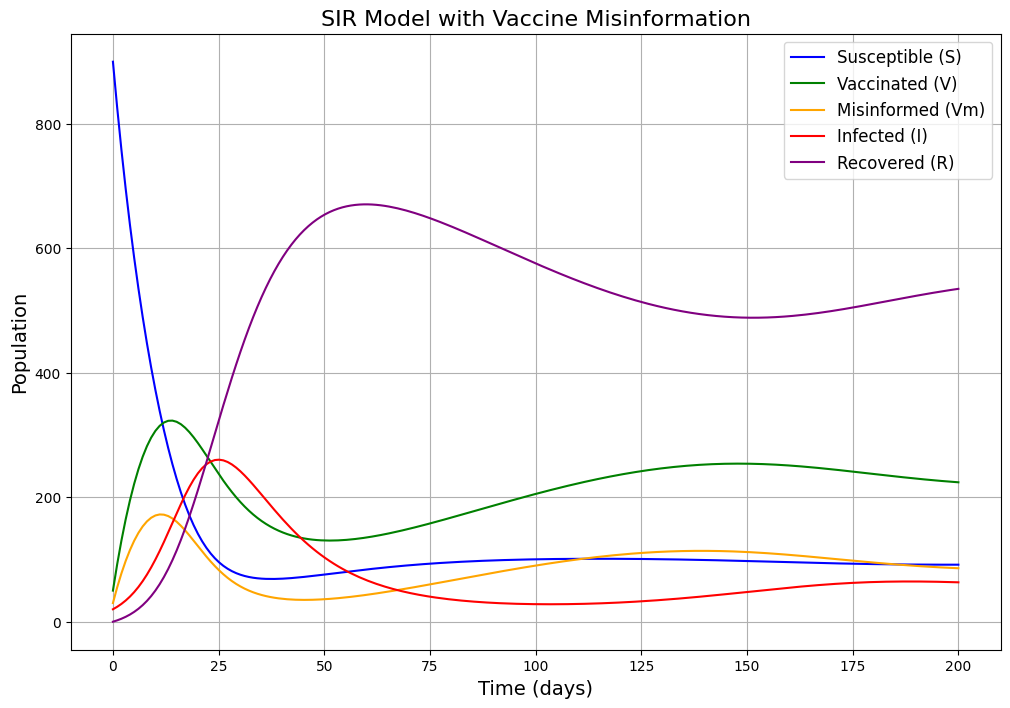

In [7]:
# Visualisasi hasil
plt.figure(figsize=(12, 8))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, V, label='Vaccinated (V)', color='green')
plt.plot(t, Vm, label='Misinformed (Vm)', color='orange')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='purple')

plt.title('SIR Model with Vaccine Misinformation', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



In [8]:
# Penjelasan
# Grafik di atas menunjukkan dinamika populasi di setiap kompartemen selama waktu simulasi.
# 1. Kompartemen S (rentan) cenderung menurun karena vaksinasi, infeksi, atau berpindah ke Vm.
# 2. Kompartemen V (divaksinasi) meningkat akibat vaksinasi dari S, tetapi bisa menurun karena infeksi.
# 3. Kompartemen Vm (terkena misinformasi) meningkat pada awalnya, kemudian menurun karena infeksi.
# 4. Kompartemen I (terinfeksi) menunjukkan pola gelombang infeksi sebelum menurun karena pemulihan dan kematian.
# 5. Kompartemen R (pulih) terus meningkat seiring banyaknya individu yang sembuh dari infeksi.